In [105]:
from ds_preamble import *

In [106]:
df = pd.read_csv('bank_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41188 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

<AxesSubplot:xlabel='y'>

<Figure size 576x360 with 0 Axes>

<AxesSubplot:xlabel='y', ylabel='income_yr1'>

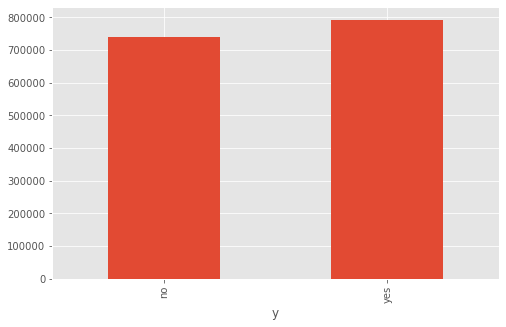

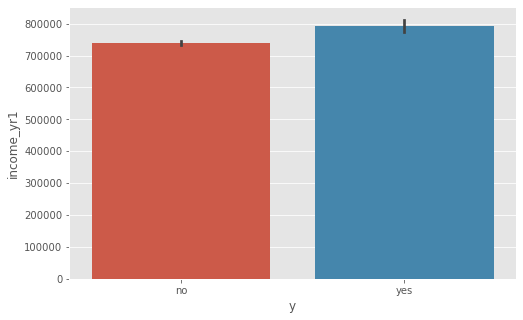

In [107]:
# df.income_yr1

# plt.scatter(df.income_yr1, df.y)

df.groupby('y')['income_yr1'].mean().plot.bar()
plt.figure()
sns.barplot(data=df, x='y', y='income_yr1')


In [108]:
df['age_group']=pd.cut(df.age, bins=[0,18,31,41,51,61,np.inf], right=False)

In [109]:
# .startswith('income_yr')

df['income'] = df.loc[:, df.columns.str.startswith('income_yr')].mean(axis=1)

In [110]:
# df.balance.values[:30]


# df.balance[lambda x: x.isna()]

# df.balance[df.balance.isna()]

type(df.balance[3])


df.balance[3] =='nan'
df.balance[3] == float('nan')

# pd.na()
pd.isna(df.balance[3])

df.balance[3]




float

False

False

True

nan

In [111]:
vals = df.balance.values
vals

array([' 2143 USD', '29US ', '2 HKD', ..., ' USD9962 ', '2239 Usd ',
       'HKD1978 '], dtype=object)

In [112]:
for i, val in enumerate(vals):
    # dollar = int(''.join(c for c in val if c.isdigit()))
    # if val != float('nan'):
    # if val != float('nan'):
    if not pd.isna(val):
        # print([c for c in val if c.isdigit() or c=='-'])
        dollar = int(''.join(c for c in val if c.isdigit() or c=='-'))
        if 'us' in val.lower():
            dollar*=7.8
        vals[i] = dollar

# int('-371')


In [101]:
df.balance.isna().mean() # percent of missing
df.income.isna().mean()

0.027945032533747693

0.0

In [121]:
df.balance.fillna(df.balance.median())

0        16715.4
1          226.2
2            2.0
3         1301.0
4            7.8
          ...   
41183    10253.0
41184     2706.6
41185    77703.6
41186    17464.2
41187     1978.0
Name: balance, Length: 41188, dtype: float64

In [122]:
df.groupby(['age_group', 'gender']).balance.transform(lambda x: x.fillna(x.median()))

# temp = df.groupby(['age_group', 'gender']).balance.transform('median')
# df.balance
# df.balance.fillna(temp)




# temp[temp.isna()] # check if there are missing after imputation
# df.balance = temp

0        16715.4
1          226.2
2            2.0
3         1349.4
4            7.8
          ...   
41183    10253.0
41184     2706.6
41185    77703.6
41186    17464.2
41187     1978.0
Name: balance, Length: 41188, dtype: float64

In [104]:
temp = df.groupby('education').income.transform('median')
temp


# temp[temp.isna()] # check if there are missing after imputation

# df.balance = temp

0        2.576975e+05
1        2.917292e+05
2        2.917292e+05
3        2.685856e+05
4        2.917292e+05
             ...     
41183    2.072555e+06
41184    2.072555e+06
41185    8.955915e+05
41186    2.072555e+06
41187    2.072555e+06
Name: income, Length: 41188, dtype: float64